In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-urdu'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مَیں نے اپنا رُجحان بری کر دیا مگر وہ ہمیشہ پہلے غار میں کھڑا رہتا تھا 1
@اناسکر نے آپ کو اپنی نفرت اور حسد کے ساتھ دیکھ کر بہت سے مسلمان یہودی بھی امن میں رہتے ہیں، یہاں تک کہ آج بھی بہت سے مسلمان ہیں، یہاں تک کہ عربوں کے ساتھ امن و سلامتی بھی، یہ مذہب ہم پر نہیں ہے۔ 1
@وہن: آپ کو ضرور ضرور کرنا ہوگا! میں نے کرسمس کے ایک شخص کو اس میں سے ایک تھا کہ یہ میرے بیگ میں کئی سال سے نہیں ملا تھا۔ 0
@NNx] ہم ان کے جواب سننے کے لئے انتظار کر رہے ہیں (کہ وہ آپ سے کیا پوچھے گا)۔ 0
میں اس پروجیکٹ سے بہت متاثر ہوں، امید ہے کہ اس واقعے اور خاص طور پر یہ خزانہ کامیابی حاصل کرے گا. 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

مَیں نے اپنا رُجحان بری کر دیا مگر وہ ہمیشہ پہلے غار میں کھڑا رہتا تھا 1
اناسکر نے آپ کو اپنی نفرت حسد ساتھ دیکھ کر بہت سے مسلمان یہودی بھی امن میں رہتے ہیں، یہاں بھی بہت سے مسلمان ہیں، یہاں عربوں ساتھ امن سلامتی بھی، مذہب ہم نہیں ہے۔ 1
وہن آپ کو کرنا ہوگا میں نے کرسمس شخص کو اس میں سے تھا میرے بیگ میں سال سے نہیں ملا تھا۔ 0
nnx ہم ان جواب سننے انتظار کر وہ آپ سے کیا پوچھے گا۔ 0
میں اس پروجیکٹ سے بہت متاثر ہوں، امید اس واقعے خاص خزانہ کامیابی حاصل گا 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)
print(model)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 478/478 [02:38<00:00,  3.02it/s, loss=0.519]


Train loss 0.4891684222420888 accuracy 0.7429281533078257
Validation loss 0.4363897770643234 accuracy 0.7818601000686746
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.7818601000686746
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 478/478 [02:41<00:00,  2.96it/s, loss=0.419]


Train loss 0.41785297539693045 accuracy 0.7958566336374636
Validation loss 0.43044753577560185 accuracy 0.7854900421858139
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.7854900421858139
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 478/478 [02:38<00:00,  3.01it/s, loss=0.366]


Train loss 0.37721815430968375 accuracy 0.8216096013604107
Validation loss 0.4519180737435818 accuracy 0.7846561365643089
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 478/478 [02:38<00:00,  3.02it/s, loss=0.292]


Train loss 0.3370448262995756 accuracy 0.8438470846005429
Validation loss 0.481137390807271 accuracy 0.7784754243108015
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 478/478 [02:38<00:00,  3.01it/s, loss=0.27] 


Train loss 0.295593869829527 accuracy 0.8661990254749992
Validation loss 0.5548140248283744 accuracy 0.7809280879034632
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 478/478 [05:25<00:00,  1.47it/s, loss=0.261]  


Train loss 0.25810017293342485 accuracy 0.8862945158442068
Validation loss 0.6084809431806206 accuracy 0.7738644167565977
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  2.99it/s, loss=0.13]  


Train loss 0.2231689039539842 accuracy 0.9030053304555414
Validation loss 0.6682852748781443 accuracy 0.7702835279113117
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


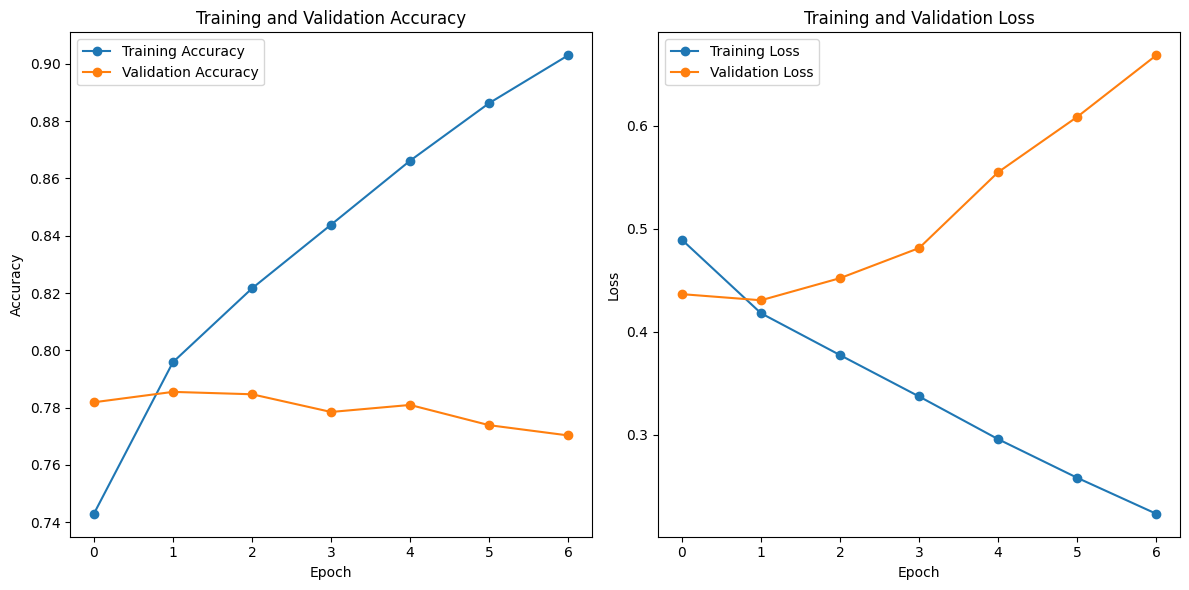

In [9]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [11]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.7857458184136951 Test Loss: 0.43350797053426504


Accuracy: 0.79
F1 Score: 0.79
Precision: 0.8
Recall: 0.79

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.85      0.75      0.80     11543
        Hate       0.72      0.83      0.77      8844

    accuracy                           0.79     20387
   macro avg       0.79      0.79      0.78     20387
weighted avg       0.80      0.79      0.79     20387



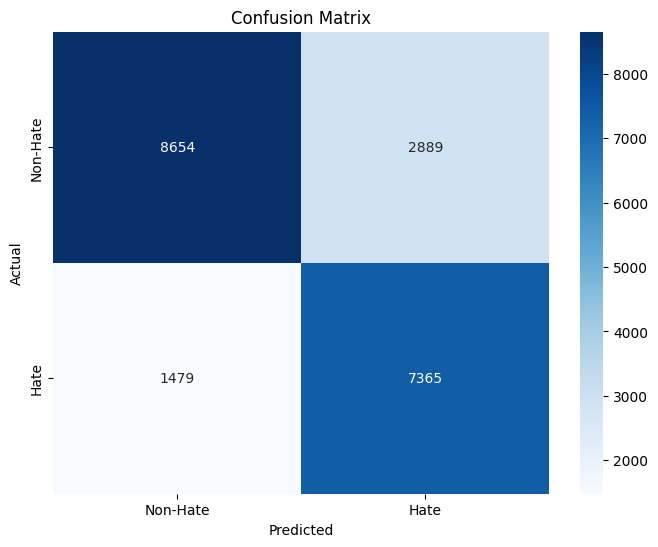

In [12]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [13]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Not Hate Speech 
Confidence: 0.88
